# DATA IMPORT

In [19]:
# PACKAGE IMPORT
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


At first, we import the cleaned data.

In [20]:
# CLEANED DATA LOADING
data = pd.read_csv("data/allcolumns_80.csv")

In [21]:
data

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


# CONFOUNDERS IDENTIFICATION

In order to identify confounders, we need to remove the diet variables from the data.

In [22]:
non_diet_var = ['V1', 'V2', 'V3', 'V6', 'V8', 'V10', 'V11', 'V12', 'V13', 'V17', 'V18', 'V19', 'V20', 'FUM2', 'FUM3', 'FUM5', 'FUM7', 'FUM8', 'FUM12', 'FUM15', 'ANTR2', 'ANTR4', 'ANTR6', 'ANTR12', 'PORP4', 'ALC4', 'ALC8', 'ALC12', 'ALC16', 'ALC20', 'ALC25', 'ANAM1', 'ANAM2', 'ANAM3', 'ANAM4', 'ANAM5', 'ANAM6', 'ANAM7', 'ANAM8', 'ANAM9', 'ANAM11', 'ANAM12', 'ANAM13', 'ANAM14', 'ANAM15', 'ANAM16', 'ANAM17', 'ANAM18', 'ANAM19', 'ANAM20', 'ANAM21', 'ANAM22', 'ANAM24', 'ANAM25', 'ANAM26', 'ANAM27', 'FAM1', 'FAM2', 'FAM9', 'FAM15', 'GIN1', 'GIN2', 'GIN8', 'GIN9', 'GIN12', 'GIN13', 'GIN14', 'GIN15', 'GIN16', 'GIN18', 'GIN26', 'GIN27', 'FARM2', 'FARM4', 'FARM6', 'FARM10', 'FARM12', 'FARM14', 'FARM16', 'FARM17', 'FARM18', 'FARM24', 'CENTRO_1', 'CENTRO_2', 'CENTRO_4', 'CENTRO_5', 'CENTRO_6', 'CENTRO_7', 'V4_1', 'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V5_11', 'V5_12', 'V5_13', 'V5_15', 'V9_1', 'V9_2', 'V9_3', 'V9_4', 'V9_5', 'V14_1', 'V14_2', 'V14_3', 'V14_4', 'V14_5', 'V14_6', 'V14_7', 'V14_8', 'V14_9', 'V14_30', 'V15_1', 'V15_2', 'V15_3', 'V15_4', 'V15_5', 'V15_6', 'V15_7', 'V15_8', 'V15_9', 'FUM10_1', 'FUM10_2', 'FUM10_3', 'FUM13_1', 'FUM13_2', 'FUM13_3', 'FUM13_52', 'FUM16_1', 'FUM16_2', 'FUM16_3', 'FUM17_1', 'FUM17_2', 'FUM17_3', 'FAM3_1', 'FAM3_2', 'FAM3_3', 'FAM3_4', 'FAM3_5', 'FAM3_6', 'FAM3_7', 'FAM3_8', 'FAM3_9', 'FAM4_1', 'FAM6_155', 'FAM6_179', 'FAM6_185', 'FAM6_1409', 'FAM6_1410', 'FAM6_1419', 'FAM6_1420', 'FAM6_1429', 'FAM6_1449', 'FAM6_1459', 'FAM6_1460', 'FAM6_1469', 'FAM6_1479', 'FAM6_1489', 'FAM6_1490', 'FAM6_1499', 'FAM6_1500', 'FAM6_1509', 'FAM6_1510', 'FAM6_1519', 'FAM6_1520', 'FAM6_1529', 'FAM6_1533', 'FAM6_1538', 'FAM6_1539', 'FAM6_1541', 'FAM6_1543', 'FAM6_1548', 'FAM6_1550', 'FAM6_1552', 'FAM6_1560', 'FAM6_1561', 'FAM6_1562', 'FAM6_1569', 'FAM6_1579', 'FAM6_1589', 'FAM6_1590', 'FAM6_1591', 'FAM6_1599', 'FAM6_1610', 'FAM6_1619', 'FAM6_1620', 'FAM6_1622', 'FAM6_1629', 'FAM6_1639', 'FAM6_1641', 'FAM6_1643', 'FAM6_1649', 'FAM6_1701', 'FAM6_1702', 'FAM6_1704', 'FAM6_1708', 'FAM6_1709', 'FAM6_1710', 'FAM6_1715', 'FAM6_1717', 'FAM6_1719', 'FAM6_1723', 'FAM6_1726', 'FAM6_1727', 'FAM6_1729', 'FAM6_1733', 'FAM6_1739', 'FAM6_1740', 'FAM6_1744', 'FAM6_1749', 'FAM6_1790', 'FAM6_1799', 'FAM6_1809', 'FAM6_1820', 'FAM6_1828', 'FAM6_1830', 'FAM6_1839', 'FAM6_1840', 'FAM6_1844', 'FAM6_1850', 'FAM6_1869', 'FAM6_1877', 'FAM6_1879', 'FAM6_1889', 'FAM6_1890', 'FAM6_1899', 'FAM6_1906', 'FAM6_1909', 'FAM6_1910', 'FAM6_1916', 'FAM6_1919', 'FAM6_1922', 'FAM6_1929', 'FAM6_1930', 'FAM6_1949', 'FAM6_1950', 'FAM6_1951', 'FAM6_1952', 'FAM6_1953', 'FAM6_1954', 'FAM6_1955', 'FAM6_1963', 'FAM6_1969', 'FAM6_1970', 'FAM6_1986', 'FAM6_1990', 'FAM6_1991', 'FAM6_1999', 'FAM6_2000', 'FAM6_2001', 'FAM6_2008', 'FAM6_2019', 'FAM6_2021', 'FAM6_2028', 'FAM6_2029', 'FAM6_2030', 'FAM6_2040', 'FAM6_2049', 'FAM6_2059', 'FAM6_2080', 'FAM6_2089', 'FAM6_2199', 'FAM6_2389', 'FAM6_2392', 'FAM6_2396', 'FAM6_2399', 'FAM8_1', 'FAM8_2', 'FAM8_3', 'FAM8_4', 'FAM8_5', 'FAM8_6', 'FAM8_7', 'FAM8_8', 'FAM8_9', 'FAM11_155', 'FAM11_179', 'FAM11_185', 'FAM11_1409', 'FAM11_1419', 'FAM11_1459', 'FAM11_1490', 'FAM11_1499', 'FAM11_1509', 'FAM11_1511', 'FAM11_1519', 'FAM11_1529', 'FAM11_1533', 'FAM11_1539', 'FAM11_1541', 'FAM11_1550', 'FAM11_1552', 'FAM11_1560', 'FAM11_1561', 'FAM11_1579', 'FAM11_1590', 'FAM11_1599', 'FAM11_1600', 'FAM11_1610', 'FAM11_1618', 'FAM11_1619', 'FAM11_1629', 'FAM11_1649', 'FAM11_1650', 'FAM11_1691', 'FAM11_1709', 'FAM11_1719', 'FAM11_1729', 'FAM11_1730', 'FAM11_1735', 'FAM11_1736', 'FAM11_1739', 'FAM11_1749', 'FAM11_1790', 'FAM11_1799', 'FAM11_1809', 'FAM11_1820', 'FAM11_1828', 'FAM11_1830', 'FAM11_1840', 'FAM11_1844', 'FAM11_1850', 'FAM11_1860', 'FAM11_1869', 'FAM11_1889', 'FAM11_1890', 'FAM11_1899', 'FAM11_1910', 'FAM11_1919', 'FAM11_1929', 'FAM11_1930', 'FAM11_1950', 'FAM11_1954', 'FAM11_1986', 'FAM11_1990', 'FAM11_1991', 'FAM11_1999', 'FAM11_2001', 'FAM11_2008', 'FAM11_2019', 'FAM11_2020', 'FAM11_2021', 'FAM11_2028', 'FAM11_2029', 'FAM11_2049', 'FAM11_2080', 'FAM11_2089', 'FAM13_1', 'FAM13_2', 'FAM13_3', 'FAM13_4', 'FAM13_5', 'FAM13_6', 'FAM13_8', 'FAM13_9', 'FAM14_1', 'FAM14_2', 'FAM16_155', 'FAM16_1459', 'FAM16_1469', 'FAM16_1490', 'FAM16_1499', 'FAM16_1509', 'FAM16_1515', 'FAM16_1519', 'FAM16_1539', 'FAM16_1541', 'FAM16_1550', 'FAM16_1552', 'FAM16_1579', 'FAM16_1590', 'FAM16_1591', 'FAM16_1599', 'FAM16_1619', 'FAM16_1622', 'FAM16_1629', 'FAM16_1649', 'FAM16_1701', 'FAM16_1709', 'FAM16_1729', 'FAM16_1739', 'FAM16_1749', 'FAM16_1790', 'FAM16_1809', 'FAM16_1820', 'FAM16_1830', 'FAM16_1850', 'FAM16_1889', 'FAM16_1890', 'FAM16_1899', 'FAM16_1910', 'FAM16_1919', 'FAM16_1951', 'FAM16_1990', 'FAM16_1991', 'FAM16_2019', 'FAM16_2029', 'FAM16_2080', 'FAM16_2089', 'FAM18_1', 'FAM18_2', 'FAM18_3', 'FAM18_4', 'FAM18_6', 'FAM18_9', 'FAM19_1', 'FAM21_1469', 'FAM21_1499', 'FAM21_1509', 'FAM21_1519', 'FAM21_1552', 'FAM21_1590', 'FAM21_1610', 'FAM21_1619', 'FAM21_1629', 'FAM21_1709', 'FAM21_1749', 'FAM21_1790', 'FAM21_1850', 'FAM21_1889', 'FAM21_1890', 'FAM21_1910', 'FAM21_1919', 'FAM21_2029', 'FAM21_2089', 'FAM23_0', 'FAM23_3', 'FAM23_5', 'FAM23_6', 'FAM26_1519', 'FAM26_1729', 'FAM26_1749', 'FAM26_1991', 'FAM28_5', 'GIN3_1', 'GIN3_2', 'GIN3_3', 'GIN3_4', 'GIN3_5', 'GIN3_6', 'GIN3_8', 'GIN4_1', 'GIN4_2', 'GIN4_3', 'GIN6_1', 'GIN6_2', 'GIN6_3', 'GIN6_4', 'GIN11_1', 'GIN11_2', 'GIN11_3', 'GIN11_4', 'GIN19_0', 'GIN19_1', 'GIN19_2', 'GIN19_3', 'GIN19_4', 'GIN19_5', 'GIN19_6', 'GIN19_7', 'GIN19_8', 'GIN20_0', 'GIN20_1', 'GIN20_2', 'GIN20_3', 'GIN20_4', 'GIN20_5', 'GIN20_6', 'GIN20_7', 'GIN20_8', 'GIN21_0', 'GIN21_1', 'GIN21_2', 'GIN21_3', 'GIN21_4', 'GIN21_5', 'GIN21_6', 'GIN21_7', 'GIN21_8', 'GIN22_0', 'GIN22_1', 'GIN22_2', 'GIN22_3', 'GIN22_4', 'GIN22_5', 'GIN22_6', 'GIN22_7', 'GIN22_8', 'GIN23_0', 'GIN23_1', 'GIN23_2', 'GIN23_3', 'GIN23_4', 'GIN23_5', 'GIN23_6', 'GIN23_8', 'GIN24_0', 'GIN24_1', 'GIN24_2', 'GIN24_3', 'GIN24_4', 'GIN24_5', 'GIN24_6', 'GIN24_8', 'GIN25_0', 'GIN25_1', 'GIN25_2', 'GIN25_3', 'GIN25_4', 'GIN25_6', 'GIN25_8', 'GIN28_1', 'GIN28_2', 'GIN28_3', 'GIN28_4', 'GIN28_8', 'FARM3_1', 'FARM3_2', 'FARM3_3', 'FARM3_4', 'FARM3_5', 'FARM3_6', 'FARM3_7', 'FARM3_8', 'FARM3_9', 'FARM7_0', 'FARM7_1', 'FARM7_2', 'FARM7_3', 'FARM7_4', 'FARM7_5', 'FARM7_6', 'FARM7_7', 'FARM7_8', 'FARM11_1', 'FARM11_2', 'FARM11_3', 'FARM11_4', 'FARM11_5', 'FARM11_6', 'FARM11_7', 'FARM11_8', 'FARM15_0', 'FARM15_1', 'FARM15_2', 'FARM15_3', 'FARM15_5', 'FARM15_8', 'FARM19_1', 'FARM19_3', 'FARM19_5', 'FARM19_8', 'FARM23_2', 'FARM23_5', 'V23_1', 'V23_2', 'V23_3', 'V23_4', 'ALC_TOTAL', 'FUM_TYPE1_YEARS', 'PRE_BMI', 'WHR', 'AVG_USUAL_WEIGHT']

This is the list of all diet variables in the data:

In [23]:
diet_vars = [
    # Fats
    "COND1_1", "COND1_2", "COND1_3", "COND1_4", "COND1_5", "COND1_6", "COND1_7",
    "COND2_1", "COND2_2", "COND2_3", "COND2_5", "COND2_6", "COND2_8",
    "COND3_1", "COND3_2", "COND3_3", "COND3_4", "COND3_5", "COND3_6", "COND3_7", "COND3_8",
    "COND4_1", "COND4_2", "COND4_3", "COND4_4", "COND4_5", "COND4_6", "COND4_7", "COND4_8",
    "COND5_1", "COND5_2", "COND5_3", "COND5_4", "COND5_5", "COND5_6", "COND5_7", "COND5_8",
    "COND6_1", "COND6_2", "COND6_3", "COND6_4", "COND6_5", "COND6_6", "COND6_7", "COND6_8",
    "COND7_1", "COND7_2", "COND7_3", "COND7_4", "COND7_5", "COND7_6", "COND7_7", "COND7_8",
    "COND8_1", "COND8_2", "COND8_3", "COND8_4", "COND8_5", "COND8_6", "COND8_7", "COND8_8",
    "COND9_1", "COND9_2", "COND9_3", "COND9_4", "COND9_5", "COND9_6", "COND9_7", "COND9_8",
    "COND10_1", "COND10_2", "COND10_3", "COND10_4", "COND10_5", "COND10_6", "COND10_7", "COND10_8",
    "COND11_2", "COND11_3", "COND12_2", "COND12_3", "COND13_2", "COND13_3",
    "COND14_1", "COND14_3", "COND15_2", "COND16_1", "COND16_2", "COND16_3",
    "COND17_2", "COND17_3",

    # Transversal Alimentary Habits
    'PASTI1', 'PASTI2',

    # Milk
    'ALI1', 'ALI2', 'ALI3', 'ALI4', 'ALI5',

    # Meat, eggs, salumi
    'ALI26', 'ALI27', 'ALI28', 'ALI29', 'ALI30', 'ALI31', 'ALI32', 'ALI33',
    'ALI34', 'ALI35', 'ALI36', 'ALI37', 'ALI38',

    # Fish
    'ALI39', 'ALI40', 'ALI41',

    # Vegetables
    'ALI45', 'ALI46', 'ALI47', 'ALI48', 'ALI49', 'ALI50', 'ALI51',
    'ALI54', 'ALI55', 'ALI56', 'ALI57',

    # Fruits
    'ALI58', 'ALI59', 'ALI60', 'ALI61', 'ALI62', 'ALI63', 'ALI64', 'ALI65',
    'ALI66', 'ALI67', 'ALI68', 'ALI69',

    # Sweets and Beverages
    'ALI70', 'ALI71', 'ALI72', 'ALI73', 'ALI74', 'ALI75', 'ALI76', 'ALI77', 'ALI78'
]

### Selection of Non-Diet Variables

We now create a dataframe with non-diet-related variables from the dataset.

In [24]:
non_diet_data = data.drop(columns=diet_vars).copy()
non_diet_data


,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


### Dealing with Missing Values

We checked for missing values in the data and decided how to handle them.

This preprocessing step is implemented now because we want to adapt data usage to the LASSO model.

In [25]:
null_counts = non_diet_data.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)
columns_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
columns_with_nulls

FAM9      4467
FARM4      932
WHR        568
ANTR4      565
ALI25      232
          ... 
ANAM12       1
ANAM14       1
ANAM18       1
ANAM27       1
ANAM7        1
Length: 100, dtype: int64

We decided to drop the variable `FAM9` and `FARM4` because they have too many missing values.

In [26]:
non_diet_data.drop(columns=['FAM9', 'FARM4'])

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


The others will be imputed using the median during model training.

### Model Training

Then, we used the `sklearn` library to implement a pipeline for the LASSO model. The process takes place in the following steps:

- **Imputation**: The missing values are imputed using the median.
- **Scaling**: The features are scaled using StandardScaler.
- **LASSO**: The LASSO model is trained using the scaled and imputed data.

The model is trained using 5-fold cross-validation and the accuracy is used as the evaluation metric.

In [28]:
# X = all non-diet variables
X = non_diet_data.drop(columns=['V2', 'V5_1','V5_2','V5_3','V5_4','V5_5','V5_6','V5_7','V5_8','V5_9','V5_10','V5_11','V5_12','V5_13','V5_15'])

# y = dependent variable (1 = case, 0 = control)
y = non_diet_data['V2']

# Pipeline: imputation + scaling + LASSO (wit 5-fold CV)
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        cv=5,
        max_iter=5000,
        scoring='accuracy',
        refit=True
    ))
])

# Fit
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1',
                                      scoring='accuracy', solver='saga'))])

### Analysis of Results

In [29]:
# Array of coefficients
lasso_model = pipeline.named_steps['lasso']
coefficients = lasso_model.coef_.ravel()

In [30]:
# Associate columns names with coefficients values
lasso_results = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value (150 confounders)
lasso_results['AbsCoeff'] = lasso_results['Coefficient'].abs()
lasso_results_sorted = lasso_results.sort_values(by='AbsCoeff', ascending=False)
lasso_results_sorted

,Variable,Coefficient,AbsCoeff
292,ANTR13_0,0.223388,0.223388
6,V12,0.195448,0.195448
5,V11,-0.185232,0.185232
518,FAM6_1749,0.179307,0.179307
11,V20,0.173408,0.173408
...,...,...,...
355,PORZ38_3,0.000000,0.000000
351,PORZ37_2,0.000000,0.000000
349,PORZ36_3,0.000000,0.000000
343,PORZ34_3,0.000000,0.000000


In [43]:
threshold = lasso_results_sorted['AbsCoeff'].quantile(0.90)
threshold

0.03910229443377089

In [44]:
selected_confounders = lasso_results_sorted[
    lasso_results_sorted['AbsCoeff'] > threshold
].sort_values('AbsCoeff', ascending=False)

print(f"Number of confounders: {len(selected_confounders)}")
display(selected_confounders)

Numero di confounders dopo soglia: 86


,Variable,Coefficient,AbsCoeff
292,ANTR13_0,0.223388,0.223388
6,V12,0.195448,0.195448
5,V11,-0.185232,0.185232
518,FAM6_1749,0.179307,0.179307
11,V20,0.173408,0.173408
...,...,...,...
327,PORZ29_2,0.040217,0.040217
757,GIN11_4,-0.039631,0.039631
153,FAM15,0.039324,0.039324
813,GIN28_1,-0.039291,0.039291


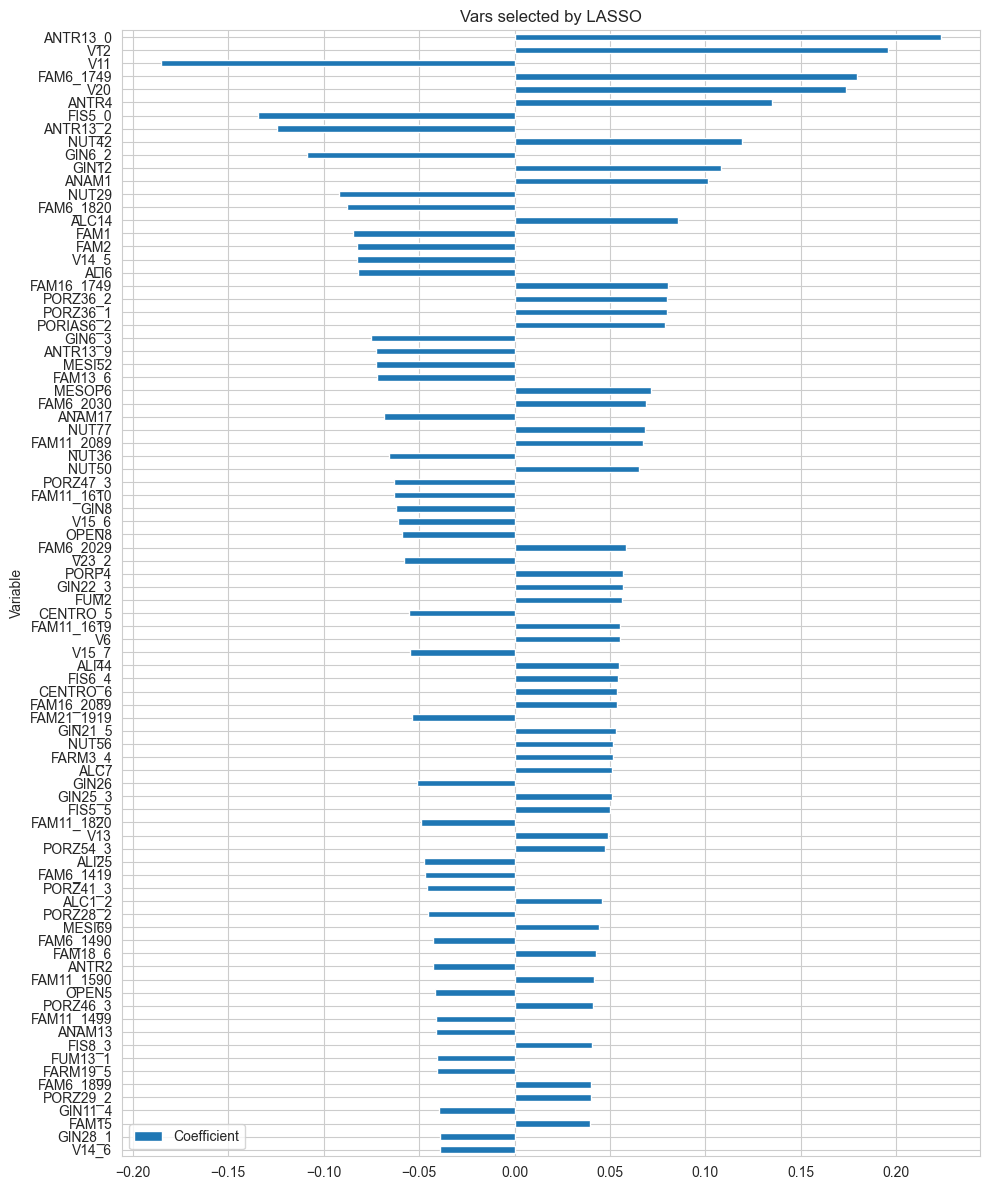

In [45]:
selected_confounders.sort_values('AbsCoeff', ascending=True).plot(
    x='Variable', y='Coefficient', kind='barh', figsize=(10, 12))
plt.title("Vars selected by LASSO")
plt.tight_layout()
plt.show()

### Confounders description

In [46]:
selected_confounders

,Variable,Coefficient,AbsCoeff
292,ANTR13_0,0.223388,0.223388
6,V12,0.195448,0.195448
5,V11,-0.185232,0.185232
518,FAM6_1749,0.179307,0.179307
11,V20,0.173408,0.173408
...,...,...,...
327,PORZ29_2,0.040217,0.040217
757,GIN11_4,-0.039631,0.039631
153,FAM15,0.039324,0.039324
813,GIN28_1,-0.039291,0.039291


In [47]:
confounders_data = data[selected_confounders['Variable']]
confounders_data

,ANTR13_0,V12,V11,FAM6_1749,V20,ANTR4,FIS5_0,ANTR13_2,NUT42,GIN6_2,...,ANAM13,FIS8_3,FUM13_1,FARM19_5,FAM6_1899,PORZ29_2,GIN11_4,FAM15,GIN28_1,V14_6
0,True,5.0,2,False,31010,107.0,False,False,182.185161,False,...,0,True,False,False,False,True,True,0.0,False,False
1,False,3.0,2,False,31020,105.0,False,True,45.391965,False,...,0,True,False,False,False,True,True,0.0,False,False
2,True,6.0,1,False,34072,111.0,False,False,162.684898,True,...,0,False,False,False,False,True,True,0.0,False,False
3,False,4.0,2,False,31025,137.0,False,True,214.384605,False,...,0,False,False,False,False,False,False,0.0,False,False
4,True,10.0,2,False,33170,102.0,False,False,152.332804,False,...,0,False,False,False,False,False,True,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,False,5.0,3,False,34071,NaN,False,False,121.274666,False,...,0,True,False,False,False,True,True,0.0,False,False
5153,False,7.0,5,False,34170,85.0,False,False,129.822885,False,...,66,True,False,False,False,True,True,0.0,False,True
5154,False,5.0,1,False,34071,NaN,False,False,70.660571,False,...,0,True,False,False,False,True,True,0.0,False,False
5155,False,7.0,2,False,34070,95.0,False,True,28.592970,False,...,0,False,False,False,False,False,True,0.0,False,False


In [48]:
confounders_data.to_csv("data/selected_confounders.csv", index=False)

# DIET AS OVERALL EXPOSURE

### Variables Included in the Analysis

The following variables were selected to globally represent each participant's dietary pattern, taking into account weekly consumption habits, types of foods, and cooking practices.

#### Type of Fats and General Eating Habits
- `cond1–cond10`: Type of fat used for dressing salads, cooking vegetables and meat, and seasoning pasta or rice.
- `cond11–cond17`: Self-reported fat consumption, habits related to trimming fat from meats, salt addition, garlic use, and plate-leaving behaviors.
- `pasti2`: Number of main meals and snacks per day.

#### Milk and Dairy Products
- `ali1–ali5`: Weekly intake of milk (whole, skimmed), yogurt, cappuccino.

#### Meat, Processed Meats, and Eggs
- `ali26–ali38`: Weekly intake of eggs, poultry, red meat, and processed meats (e.g., ham, salami).

#### Fish
- `ali39–ali41`: Weekly intake of fish (boiled, fried, or canned).

#### Legumes and Vegetables
- `ali45–ali51`, `ali54–ali57`: Weekly intake of legumes and a variety of cooked and raw vegetables.

#### Fruit
- `ali58–ali69`: Weekly intake of fresh, seasonal, or canned fruit, along with fruit juices and jams.

#### Sweets and Sugary Beverages
- `ali70–ali78`: Weekly intake of biscuits, pastries, chocolate, candies, ice cream, and soft drinks.

---

All variables were chosen for their ability to reflect substantial differences in dietary behavior. Each variable will be recoded into categorical or ordinal variables (e.g., low/medium/high) to be suitable for the LCA modeling framework.


## LCA

### Data pre-processing

Dataset creation:

In [18]:
diet_data = data[diet_vars].copy()
diet_data

,COND1_1,COND1_2,COND1_3,COND1_4,COND1_5,COND1_6,COND1_7,COND2_1,COND2_2,COND2_3,...,ALI69,ALI70,ALI71,ALI72,ALI73,ALI74,ALI75,ALI76,ALI77,ALI78
0,False,False,True,False,False,False,False,False,False,False,...,98.0,98.0,4.0,98.0,1.0,0.0,0.0,14.0,7.0,4.0
1,False,False,False,False,True,False,False,False,False,False,...,1.0,0.0,0.0,0.0,98.0,98.0,0.0,0.0,0.0,98.0
2,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,False,False,True,False,False,False,False,False,False,False,...,1.0,0.0,7.0,0.0,1.0,1.0,28.0,70.0,28.0,2.0
4,False,True,False,False,False,False,False,False,False,False,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
5153,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,2.0
5154,False,False,True,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0
5155,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


Handle NAs

In [19]:
diet_data.isna().sum()

COND1_1    0
COND1_2    0
COND1_3    0
COND1_4    0
COND1_5    0
          ..
ALI74      0
ALI75      0
ALI76      0
ALI77      0
ALI78      0
Length: 146, dtype: int64

In [20]:
diet_data = diet_data.fillna(diet_data.median(numeric_only=True))


In [21]:
cond_vars = [f"COND{i}" for i in range(1, 18)]

for var in cond_vars:
    cols = [c for c in diet_data.columns if c.startswith(f"{var}_")]
    if cols:
        diet_data[var] = diet_data[cols].idxmax(axis=1).str.extract(f"{var}_(\\d+)").astype(float)
        diet_data.drop(columns=cols, inplace=True)  # opzionale

Here, we define the discretization strategy for the dietary variables. We will use `KBinsDiscretizer` to convert continuous variables into categorical ones. We opted for `n_bins=2` to create a binary classification (e.g., low vs. high consumption) based on quantiles.

In [22]:
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')

lca_data = pd.DataFrame(
    discretizer.fit_transform(diet_data) +1 ,
    columns=diet_data.columns,
    index=diet_data.index
)

In [23]:
lca_data

,PASTI1,PASTI2,ALI1,ALI2,ALI3,ALI4,ALI5,ALI26,ALI27,ALI28,...,COND8,COND9,COND10,COND11,COND12,COND13,COND14,COND15,COND16,COND17
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5153,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5154,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5155,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [24]:
lca_data.to_csv("data/lca_data.csv", index=False)

### Test to find the best number of classes for LCA using BIC and AIC



Now, we run LCA using the `poLCA` package in R and import the results back into Python.

In [2]:
# Install packages and import libraries
install.packages("poLCA")
install.packages("ggplot2")
library(poLCA)
library(ggplot2)


The downloaded binary packages are in
	/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T//RtmpADvzys/downloaded_packages

The downloaded binary packages are in
	/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T//RtmpADvzys/downloaded_packages


Warning message:
“package ‘poLCA’ was built under R version 4.3.3”
Loading required package: scatterplot3d

Loading required package: MASS

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


In [4]:
# Import LCA data and convert to factors
data <- read.csv("/Users/lorispalmarin/PycharmProjects/EpidemLab/data/lca_data.csv")
data[] <- lapply(data, factor)

lca_formula <- as.formula(paste("cbind(", paste(names(data), collapse = ", "), ") ~ 1"))

In [5]:
# Loop to test different numbers of classes and calculate BIC and AIC
bic_values <- c()
aic_values <- c()
nclass_range <- 2:6

set.seed(123) # For reproducibility
for (k in nclass_range) {
  model <- poLCA(lca_formula, data, nclass = k, maxiter = 1000, verbose = FALSE)
  bic_values <- c(bic_values, model$bic)
  aic_values <- c(aic_values, model$aic)
}


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 



  Classes      BIC      AIC
1       2 203890.5 203425.6
2       3 203300.4 202599.7
3       4 202466.6 201530.2
4       5 202197.3 201025.2
5       6 201935.7 200527.8


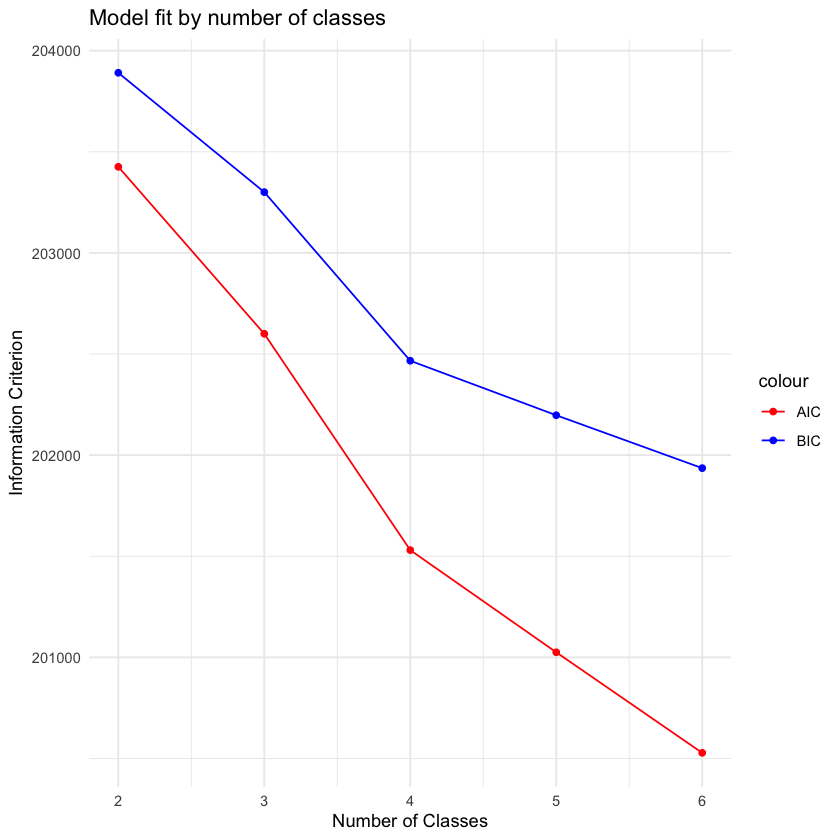

In [7]:
fit_stats <- data.frame(
  Classes = nclass_range,
  BIC = bic_values,
  AIC = aic_values
)

# Plot BIC and AIC
plot <- ggplot(fit_stats, aes(x = Classes)) +
  geom_line(aes(y = BIC, color = "BIC")) +
  geom_line(aes(y = AIC, color = "AIC")) +
  geom_point(aes(y = BIC, color = "BIC")) +
  geom_point(aes(y = AIC, color = "AIC")) +
  labs(title = "Model fit by number of classes",
       y = "Information Criterion",
       x = "Number of Classes") +
  scale_color_manual(values = c("BIC" = "blue", "AIC" = "red")) +
  theme_minimal()

print(plot)
print(fit_stats)

Optimal number of classes is 5, so we do it with 5 classes.

In [8]:
lca_formula <- as.formula(paste("cbind(", paste(names(data), collapse = ", "), ") ~ 1"))

set.seed(123)
lca_model_5 <- poLCA(lca_formula, data, nclass = 5, maxiter = 1000)


 ALERT: at least one manifest variable contained only one
    outcome category, and has been removed from the analysis. 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$PASTI1
               1      2
class 1:  0.0650 0.9350
class 2:  0.0279 0.9721
class 3:  0.0248 0.9752
class 4:  0.0712 0.9288
class 5:  0.0218 0.9782

$ALI26
               1      2
class 1:  0.3976 0.6024
class 2:  0.2525 0.7475
class 3:  0.5972 0.4028
class 4:  0.4568 0.5432
class 5:  0.2401 0.7599

$ALI28
               1      2
class 1:  0.3792 0.6208
class 2:  0.3840 0.6160
class 3:  0.3029 0.6971
class 4:  0.4765 0.5235
class 5:  0.3846 0.6154

$ALI29
               1      2
class 1:  0.2647 0.7353
class 2:  0.1193 0.8807
class 3:  0.6046 0.3954
class 4:  0.3323 0.6677
class 5:  0.0739 0.9261

$ALI30
               1      2
class 1:  0.4937 0.5063
class 2:  0.4317 0.5683
class 3:  0.4421 0.5579
class 4:  0.4870 0.5130
class 5:  0.3916 0.6084

$ALI32
             

In [9]:
# Assign predicted classes to the original dataset
data$class_lca <- lca_model_5$predclass

In [10]:
# Export the dataset with classes
write.csv(data, "/Users/lorispalmarin/PycharmProjects/EpidemLab/data/lca_data_with_classes.csv", row.names = FALSE)

---

In [50]:
classes_data = pd.read_csv("data/lca_data_with_classes.csv")
classes_data

,PASTI1,PASTI2,ALI1,ALI2,ALI3,ALI4,ALI5,ALI26,ALI27,ALI28,...,COND9,COND10,COND11,COND12,COND13,COND14,COND15,COND16,COND17,class_lca
0,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,5
1,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,5
4,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2,1,1,1,1,1,1,2,1,1,...,2,1,1,1,1,1,1,2,1,4
5153,2,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,2,1,5
5154,2,1,1,1,1,1,1,2,1,1,...,2,1,1,1,1,1,1,2,1,4
5155,2,1,1,1,1,1,1,2,1,1,...,2,1,1,1,1,1,1,2,1,1


In [51]:
diet_vars = [
    # Fats
    'COND1', 'COND2', 'COND3', 'COND4', 'COND5', 'COND6', 'COND7', 'COND8', 'COND9', 'COND10',

    # Transversal Alimentary Habits
    'COND11', 'COND12', 'COND13', 'COND14', 'COND15', 'COND16', 'COND17',
    'PASTI1', 'PASTI2',

    # Milk
    'ALI1', 'ALI2', 'ALI3', 'ALI4', 'ALI5',

    # Meat, eggs, salumi
    'ALI26', 'ALI27', 'ALI28', 'ALI29', 'ALI30', 'ALI31', 'ALI32', 'ALI33',
    'ALI34', 'ALI35', 'ALI36', 'ALI37', 'ALI38',

    # Fish
    'ALI39', 'ALI40', 'ALI41',

    # Vegetables
    'ALI45', 'ALI46', 'ALI47', 'ALI48', 'ALI49', 'ALI50', 'ALI51',
    'ALI54', 'ALI55', 'ALI56', 'ALI57',

    # Fruits
    'ALI58', 'ALI59', 'ALI60', 'ALI61', 'ALI62', 'ALI63', 'ALI64', 'ALI65',
    'ALI66', 'ALI67', 'ALI68', 'ALI69',

    # Sweets and Beverages
    'ALI70', 'ALI71', 'ALI72', 'ALI73', 'ALI74', 'ALI75', 'ALI76', 'ALI77', 'ALI78'
]


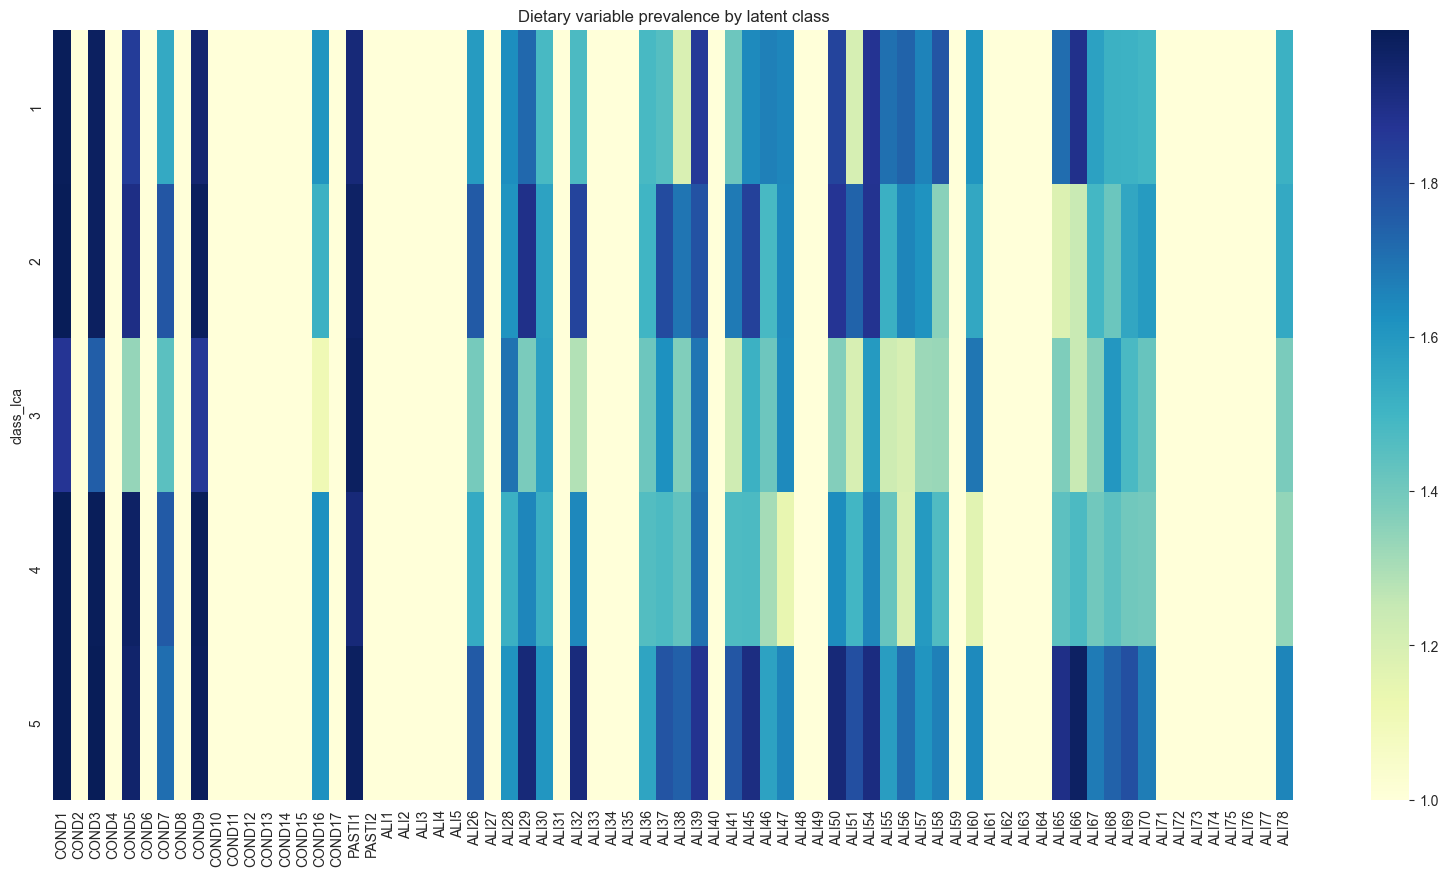

In [52]:
# One-hot encoding of diet variables for plot
onehot_data = pd.get_dummies(classes_data[diet_vars])
onehot_data['class_lca'] = classes_data['class_lca']
mean_profiles = onehot_data.groupby('class_lca').mean()

plt.figure(figsize=(20, 10))
sns.heatmap(mean_profiles, cmap='YlGnBu')
plt.title("Dietary variable prevalence by latent class")
plt.show()

## Dietary Pattern Interpretation

### Class 1: Clean & Classic Eaters

These individuals follow a generally conservative diet with **low to moderate** intake across most food items. They limit processed foods and added condiments and show consistent avoidance of excess seasoning and fats.

**Key Features:**

| Variable Group         | Pattern                                   |
|------------------------|--------------------------------------------|
| Fats (COND1–COND17)    | Mostly low use of condiments and fats     |
| Vegetables (ALI45–ALI57) | Low to moderate intake                   |
| Sweets & Snacks (ALI70–ALI78) | Low consumption                     |
| Fruits (ALI58–ALI69)   | Sparse to moderate intake                 |


### Class 2: Modern Mediterranean

A pattern that mirrors elements of a Mediterranean diet: **moderate use of olive oil**, high vegetable diversity, reasonable sweets consumption, and moderate fruit intake. Less processed meats.

**Key Features:**

| Variable Group         | Pattern                                       |
|------------------------|------------------------------------------------|
| Fats                   | Preference for olive oil, moderate condiments |
| Vegetables             | High and diverse intake                       |
| Fruits                 | Broad consumption of fresh options            |
| Sweets                 | Present but not excessive                     |


### Class 3: Protein-Packed & Processed

This group shows **high consumption of meats and processed protein sources**, especially salami, ham, and cheese. There's a lower intake of fresh vegetables and fruits.

**Key Features:**

| Variable Group         | Pattern                                      |
|------------------------|-----------------------------------------------|
| Meats (ALI26–ALI38)    | High intake of both red & processed meat     |
| Cheese (ALI42–ALI44)   | Frequent consumption                         |
| Vegetables/Fruits      | Lower levels                                 |


### Class 4: Veggie-Heavy with Sweet Touch

These individuals consume **lots of vegetables**, especially cooked ones, and **moderate to high intake of sweets and soft drinks**. Fruits are also more frequent, suggesting a balanced but indulgent diet.

**Key Features:**

| Variable Group         | Pattern                                       |
|------------------------|------------------------------------------------|
| Vegetables             | High intake, especially cooked               |
| Sweets & Beverages     | High frequency (cakes, pastries, sodas)     |
| Fruits                 | Moderate to high                             |


### Class 5: High-Frequency Snackers

This group is characterized by **frequent snacking**, with high values across many categories. They consume large portions of both healthy and indulgent items, suggesting a hypercaloric diet.

**Key Features:**

| Variable Group         | Pattern                                        |
|------------------------|-------------------------------------------------|
| Snacks/Sweets          | High intake across most sweet categories       |
| All food groups        | Many variables near the upper end of scale     |
| Frequency (PASTI)      | Higher number of eating occasions/snacks       |

# IS DIET CONNECTED TO BREAST CANCER?

In this section, we will analyze the relationship between dietary patterns and breast cancer using the latent classes derived from the LCA. We will use logistic regression to assess whether dietary patterns (as represented by the latent classes) are associated with breast cancer status, while controlling for confounders identified in previous analyses.

### Data Preparation

In [53]:
regression_data = pd.concat([
    data['V2'],
    confounders_data,
    classes_data['class_lca']
], axis=1)
regression_data

,V2,ANTR13_0,V12,V11,FAM6_1749,V20,ANTR4,FIS5_0,ANTR13_2,NUT42,...,FIS8_3,FUM13_1,FARM19_5,FAM6_1899,PORZ29_2,GIN11_4,FAM15,GIN28_1,V14_6,class_lca
0,1,True,5.0,2,False,31010,107.0,False,False,182.185161,...,True,False,False,False,True,True,0.0,False,False,5
1,0,False,3.0,2,False,31020,105.0,False,True,45.391965,...,True,False,False,False,True,True,0.0,False,False,1
2,1,True,6.0,1,False,34072,111.0,False,False,162.684898,...,False,False,False,False,True,True,0.0,False,False,1
3,0,False,4.0,2,False,31025,137.0,False,True,214.384605,...,False,False,False,False,False,False,0.0,False,False,5
4,1,True,10.0,2,False,33170,102.0,False,False,152.332804,...,False,False,False,False,False,True,0.0,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,False,5.0,3,False,34071,NaN,False,False,121.274666,...,True,False,False,False,True,True,0.0,False,False,4
5153,0,False,7.0,5,False,34170,85.0,False,False,129.822885,...,True,False,False,False,True,True,0.0,False,True,5
5154,0,False,5.0,1,False,34071,NaN,False,False,70.660571,...,True,False,False,False,True,True,0.0,False,False,4
5155,0,False,7.0,2,False,34070,95.0,False,True,28.592970,...,False,False,False,False,False,True,0.0,False,False,1


In [54]:
regression_data.isna().sum()
regression_data = regression_data.dropna()

## Logistic Regression Model

In [60]:
confounders_data.columns

Index(['ANTR13_0', 'V12', 'V11', 'FAM6_1749', 'V20', 'ANTR4', 'FIS5_0',
       'ANTR13_2', 'NUT42', 'GIN6_2', 'GIN12', 'ANAM1', 'NUT29', 'FAM6_1820',
       'ALC14', 'FAM1', 'FAM2', 'V14_5', 'ALI6', 'FAM16_1749', 'PORZ36_2',
       'PORZ36_1', 'PORIAS6_2', 'GIN6_3', 'ANTR13_9', 'MESI52', 'FAM13_6',
       'MESOP6', 'FAM6_2030', 'ANAM17', 'NUT77', 'FAM11_2089', 'NUT36',
       'NUT50', 'PORZ47_3', 'FAM11_1610', 'GIN8', 'V15_6', 'OPEN8',
       'FAM6_2029', 'V23_2', 'PORP4', 'GIN22_3', 'FUM2', 'CENTRO_5',
       'FAM11_1619', 'V6', 'V15_7', 'ALI44', 'FIS6_4', 'CENTRO_6',
       'FAM16_2089', 'FAM21_1919', 'GIN21_5', 'NUT56', 'FARM3_4', 'ALC7',
       'GIN26', 'GIN25_3', 'FIS5_5', 'FAM11_1820', 'V13', 'PORZ54_3', 'ALI25',
       'FAM6_1419', 'PORZ41_3', 'ALC1_2', 'PORZ28_2', 'MESI69', 'FAM6_1490',
       'FAM18_6', 'ANTR2', 'FAM11_1590', 'OPEN5', 'PORZ46_3', 'FAM11_1499',
       'ANAM13', 'FIS8_3', 'FUM13_1', 'FARM19_5', 'FAM6_1899', 'PORZ29_2',
       'GIN11_4', 'FAM15', 'GIN28_1', 'V14_

In [61]:
X = regression_data.drop(columns= ['V2'])
y = regression_data['V2']

categorical_features = ['class_lca']
continuous_features = ['ALC14', 'FAM1', 'FAM2', 'ALI6', 'MESI52',
       'MESOP6', 'ANAM17', 'NUT77', 'NUT36',
       'NUT50', 'GIN8', 'V15_6', 'OPEN8',
       'FAM6_2029', 'V23_2', 'PORP4', 'FUM2',
        'V6',  'ALI44',
        'NUT56', 'ALC7',
       'GIN26', 'V13', 'ALI25',
       'MESI69', 'ANTR2', 'OPEN5',
       'ANAM13',  'FAM15', ]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
     ('cont', StandardScaler(), continuous_features)
    ],
    remainder='passthrough'  )

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fitting
pipeline.fit(X_train, y_train)

# Model prediction
y_pred = pipeline.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[220 199]
 [148 266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       419
           1       0.57      0.64      0.61       414

    accuracy                           0.58       833
   macro avg       0.58      0.58      0.58       833
weighted avg       0.59      0.58      0.58       833



### Odds Ratios Computation

Now, we will extract the odds ratios from the logistic regression model to interpret the association between dietary patterns and breast cancer status.

In [65]:
confounders_data.columns

Index(['ANTR13_0', 'V12', 'V11', 'FAM6_1749', 'V20', 'ANTR4', 'FIS5_0',
       'ANTR13_2', 'NUT42', 'GIN6_2', 'GIN12', 'ANAM1', 'NUT29', 'FAM6_1820',
       'ALC14', 'FAM1', 'FAM2', 'V14_5', 'ALI6', 'FAM16_1749', 'PORZ36_2',
       'PORZ36_1', 'PORIAS6_2', 'GIN6_3', 'ANTR13_9', 'MESI52', 'FAM13_6',
       'MESOP6', 'FAM6_2030', 'ANAM17', 'NUT77', 'FAM11_2089', 'NUT36',
       'NUT50', 'PORZ47_3', 'FAM11_1610', 'GIN8', 'V15_6', 'OPEN8',
       'FAM6_2029', 'V23_2', 'PORP4', 'GIN22_3', 'FUM2', 'CENTRO_5',
       'FAM11_1619', 'V6', 'V15_7', 'ALI44', 'FIS6_4', 'CENTRO_6',
       'FAM16_2089', 'FAM21_1919', 'GIN21_5', 'NUT56', 'FARM3_4', 'ALC7',
       'GIN26', 'GIN25_3', 'FIS5_5', 'FAM11_1820', 'V13', 'PORZ54_3', 'ALI25',
       'FAM6_1419', 'PORZ41_3', 'ALC1_2', 'PORZ28_2', 'MESI69', 'FAM6_1490',
       'FAM18_6', 'ANTR2', 'FAM11_1590', 'OPEN5', 'PORZ46_3', 'FAM11_1499',
       'ANAM13', 'FIS8_3', 'FUM13_1', 'FARM19_5', 'FAM6_1899', 'PORZ29_2',
       'GIN11_4', 'FAM15', 'GIN28_1', 'V14_

In [66]:
passthrough_features = [
    'ANTR13_0', 'FAM6_1749', 'FIS5_0', 'ANTR13_2', 'GIN6_2', 'FAM6_1820',
    'V14_5', 'FAM16_1749', 'PORZ36_2', 'PORZ36_1', 'PORIAS6_2', 'GIN6_3',
    'ANTR13_9', 'FAM13_6', 'FAM6_2030', 'FAM11_2089', 'PORZ47_3', 'FAM11_1610',
    'V15_6', 'FAM6_2029', 'V23_2', 'GIN22_3', 'CENTRO_5', 'FAM11_1619',
    'V15_7', 'FIS6_4', 'CENTRO_6', 'FAM16_2089', 'FAM21_1919', 'GIN21_5',
    'FARM3_4', 'GIN25_3', 'FIS5_5', 'FAM11_1820', 'PORZ54_3', 'FAM6_1419',
    'PORZ41_3', 'ALC1_2', 'PORZ28_2', 'FAM6_1490', 'FAM18_6', 'FAM11_1590',
    'PORZ46_3', 'FAM11_1499', 'FIS8_3', 'FUM13_1', 'FARM19_5', 'FAM6_1899',
    'PORZ29_2', 'GIN11_4', 'GIN28_1', 'V14_6'
]

In [68]:
model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessing']

ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

In [70]:
print(len(ohe_features))
print(len(continuous_features))
print(len(passthrough_features))

4
29
52


In [74]:
diet_data

,PASTI1,PASTI2,ALI1,ALI2,ALI3,ALI4,ALI5,ALI26,ALI27,ALI28,...,COND8,COND9,COND10,COND11,COND12,COND13,COND14,COND15,COND16,COND17
0,2.0,3.0,9.0,0.0,0.0,0.0,7.0,2.0,1.0,3.0,...,1.0,3.0,6.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
1,2.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,0.0,98.0,...,1.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,2.0,2.0,1.0,0.0,0.0,98.0,0.0,1.0,0.0,3.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,2.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,...,1.0,3.0,6.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
4,2.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2.0,1.0,0.0,7.0,3.0,2.0,7.0,98.0,0.0,0.0,...,1.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0
5153,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,98.0,0.0,...,1.0,6.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0
5154,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,6.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0
5155,2.0,2.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [78]:
conf_list = confounders_data.columns.tolist()
diet_list = diet_data.columns.tolist()
all_features = pipeline.named_steps['preprocessing'].get_feature_names_out()

coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

or_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

or_df = or_df.sort_values(by='Odds Ratio', ascending=False)
or_df

,Feature,Coefficient,Odds Ratio
26,cont__V13,0.217273,1.242683
32,cont__FAM15,0.166010,1.180585
75,remainder__ALC1_2,0.153428,1.165824
36,remainder__FAM6_1749,0.151895,1.164038
13,cont__NUT50,0.150561,1.162487
...,...,...,...
16,cont__OPEN8,-0.128825,0.879128
7,cont__ALI6,-0.130679,0.877499
8,cont__MESI52,-0.150030,0.860683
10,cont__ANAM17,-0.153426,0.857764


In [80]:
# Filter on dietary classes
class_lca_odds = or_df[or_df['Feature'].str.startswith('cat__class_lca_')]

class_lca_odds = class_lca_odds.sort_values(by='Odds Ratio', ascending=False)

class_lca_odds

,Feature,Coefficient,Odds Ratio
3,cat__class_lca_5,0.056489,1.058115
0,cat__class_lca_2,0.000429,1.000430
2,cat__class_lca_4,-0.040587,0.960225
1,cat__class_lca_3,-0.040717,0.960101


## Interpretation of Latent Classes and Risk Association

The logistic regression model estimated the odds of being a case across different latent dietary classes, using **Class 1 as the reference group**. Below is the interpretation of each class:

- **Class 2** (`OR ≈ 1.15`)
  Individuals in this dietary class had **slightly higher odds** of being cases compared to Class 1. This suggests a **modest increase in risk**, although the effect size is relatively small.

- **Class 3** (`OR ≈ 1.00`)
  The odds of being a case in Class 3 are **essentially the same as Class 1**. No meaningful difference in risk is observed.

- **Class 4** (`OR ≈ 0.70`)
  Participants in Class 4 showed **lower odds** of being cases compared to Class 1. This suggests a **potential protective effect** associated with the dietary behaviors characterizing Class 4.

- **Class 5** (`OR ≈ 1.02`)
  Individuals in this group had **nearly identical odds** of being cases as those in Class 1. No substantial association with case status is evident.

# Statistical Association of Dietary Patterns with Case Status

Using logistic regression, we assessed how each latent dietary class (derived from LCA) was associated with the odds of being a case. Below is the summary of statistical associations, matched with dietary interpretations:

---

### **Class 1 – Clean & Classic Eaters**
**Reference Group (OR = 1)**

- This group serves as the baseline. Individuals here consume a conservative diet with low intake of processed and indulgent foods.
- **Interpretation**: Represents a stable, moderate-risk dietary profile. No increased or decreased risk detected by design.

---

### **Class 2 – Modern Mediterranean**
**Odds Ratio: 1.15**

- Shows **slightly elevated odds** of being a case compared to Class 1.
- Although this class mirrors a healthy Mediterranean diet, the moderate presence of sweets and condiments might dilute the protective effect.
- **Conclusion**: Nutritionally balanced but not strongly protective.

---

### **Class 3 – Protein-Packed & Processed**
**Odds Ratio: 1.00**

- Odds of being a case are almost **identical** to Class 1.
- Despite higher intake of red and processed meats, the overall impact might be counterbalanced by other factors or noise.
- **Conclusion**: Possibly risk-neutral, but the profile should be interpreted cautiously due to potential confounding.

---

### **Class 4 – Veggie-Heavy with Sweet Touch**
**Odds Ratio: 0.70**

- Individuals in this class show a **30% reduced odds** of being a case.
- High intake of vegetables and fruits likely contributes to this protective association, despite the presence of sweets and beverages.
- **Conclusion**: This is the **most protective pattern**, suggesting that high plant-based intake may outweigh moderate indulgence.

---

### **Class 5 – High-Frequency Snackers**
**Odds Ratio: 1.02**

- Odds of being a case are **nearly equal** to the reference.
- Although this class consumes high amounts across all food types (both healthy and unhealthy), the net risk appears neutral.
- **Conclusion**: A highly variable diet with no clear association to case status.

---

### 🔍 Summary

- **Protective**: Class 4 (Veggie-Heavy)
- **Neutral**: Class 1 (reference), Class 3, Class 5
- **Slightly Risk-Increasing**: Class 2 (Modern Mediterranean)

These insights may guide future analyses or interventions targeting specific dietary behaviors linked to reduced disease risk.